In [1]:
from IPython.display import display
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,20)
import numpy as np
import os
import shutil
import posixpath
from sklearn.preprocessing import StandardScaler
import wfdb
from wfdb import processing


# plot the whole record

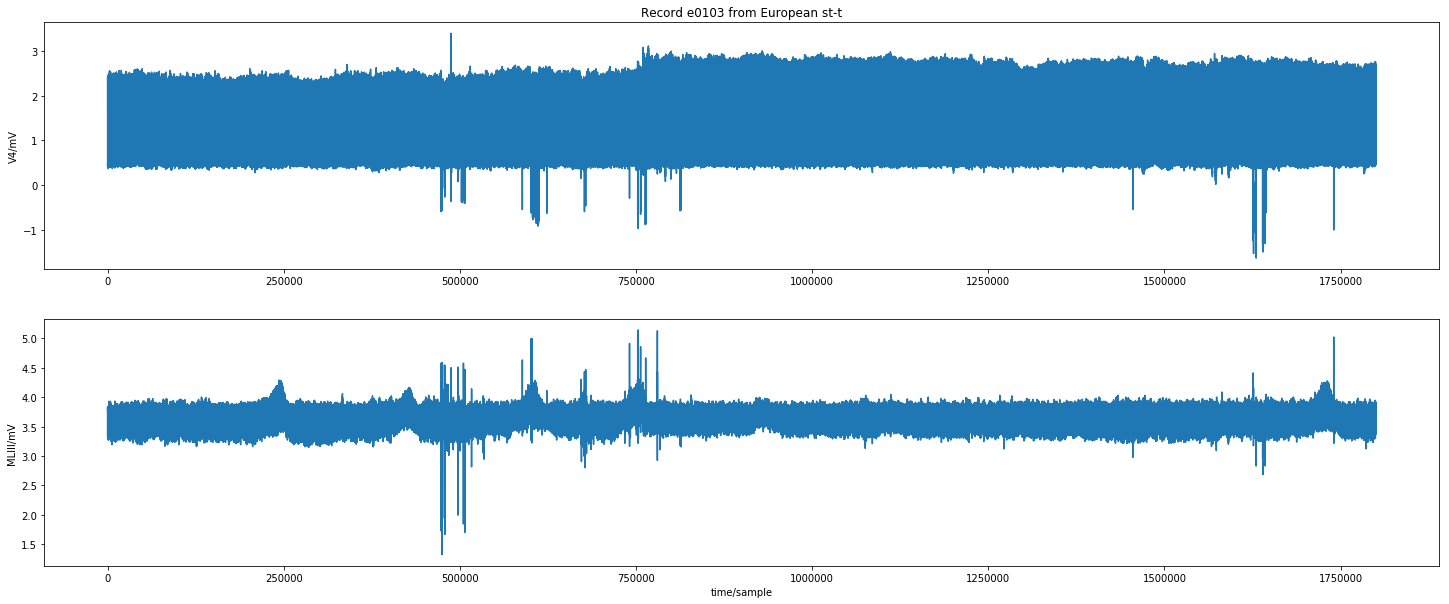

{'record_name': 'e0103',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1800000,
 'base_time': None,
 'base_date': None,
 'comments': ['Age: 62  Sex: M',
  'Mixed angina',
  '1-vessel disease (RCA)',
  'Medications: nitrates, diltiazem',
  'Recorder type: ICR 7200'],
 'sig_name': ['V4', 'MLIII'],
 'p_signal': array([[0.455, 3.755],
        [0.46 , 3.78 ],
        [0.45 , 3.765],
        ...,
        [0.535, 3.91 ],
        [0.54 , 3.87 ],
        [0.53 , 3.865]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['e0103.dat', 'e0103.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [91, 751],
 'checksum': [56457, 48959],
 'block_size': [0, 0]}

In [2]:
plt.rcParams["figure.figsize"] = (25,10)
record = wfdb.rdrecord('european-st-t-database/e0103') 
wfdb.plot_wfdb(record=record, title='Record e0103 from European st-t') 
display(record.__dict__)

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


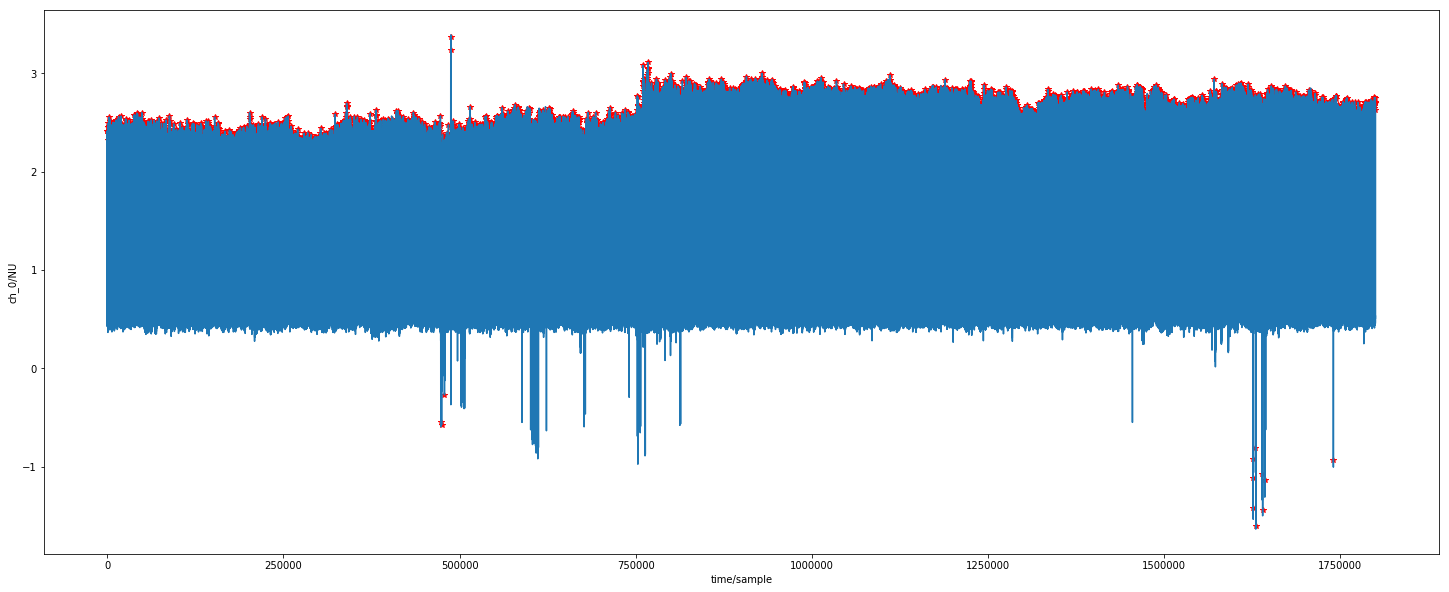

In [3]:
plt.rcParams["figure.figsize"] = (25,10)
sig, fields = wfdb.rdsamp('european-st-t-database/e0103', channels=[0])
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])

In [4]:
print(xqrs.qrs_inds)

[     50     269     502 ... 1799415 1799656 1799906]


In [5]:
import numpy as np
arr1=np.array(record.p_signal[:])
x, y = arr1.T
np.where(x == max(x))[0][0]
max(x)
x=np.array([y for y in x])
x=x.reshape(-1, 1)

In [6]:
print(x[:250])

[[0.455]
 [0.46 ]
 [0.45 ]
 [0.425]
 [0.435]
 [0.455]
 [0.49 ]
 [0.5  ]
 [0.485]
 [0.5  ]
 [0.495]
 [0.5  ]
 [0.5  ]
 [0.515]
 [0.53 ]
 [0.56 ]
 [0.57 ]
 [0.56 ]
 [0.535]
 [0.535]
 [0.535]
 [0.525]
 [0.51 ]
 [0.5  ]
 [0.5  ]
 [0.49 ]
 [0.485]
 [0.465]
 [0.46 ]
 [0.45 ]
 [0.445]
 [0.44 ]
 [0.435]
 [0.44 ]
 [0.445]
 [0.475]
 [0.495]
 [0.5  ]
 [0.5  ]
 [0.48 ]
 [0.45 ]
 [0.43 ]
 [0.43 ]
 [0.445]
 [0.495]
 [0.63 ]
 [0.88 ]
 [1.29 ]
 [1.77 ]
 [2.19 ]
 [2.415]
 [2.32 ]
 [1.985]
 [1.535]
 [1.085]
 [0.75 ]
 [0.58 ]
 [0.52 ]
 [0.525]
 [0.525]
 [0.515]
 [0.49 ]
 [0.475]
 [0.465]
 [0.45 ]
 [0.455]
 [0.455]
 [0.465]
 [0.48 ]
 [0.475]
 [0.49 ]
 [0.475]
 [0.455]
 [0.46 ]
 [0.465]
 [0.475]
 [0.475]
 [0.46 ]
 [0.485]
 [0.485]
 [0.485]
 [0.485]
 [0.495]
 [0.495]
 [0.495]
 [0.495]
 [0.495]
 [0.49 ]
 [0.485]
 [0.5  ]
 [0.515]
 [0.53 ]
 [0.515]
 [0.54 ]
 [0.555]
 [0.57 ]
 [0.58 ]
 [0.595]
 [0.575]
 [0.585]
 [0.6  ]
 [0.62 ]
 [0.65 ]
 [0.665]
 [0.695]
 [0.71 ]
 [0.725]
 [0.73 ]
 [0.73 ]
 [0.75 ]
 [0.76 ]
 

# Slice and work on the first 250 points

In [7]:
x1=x
x=x[:250]

# Plot the points

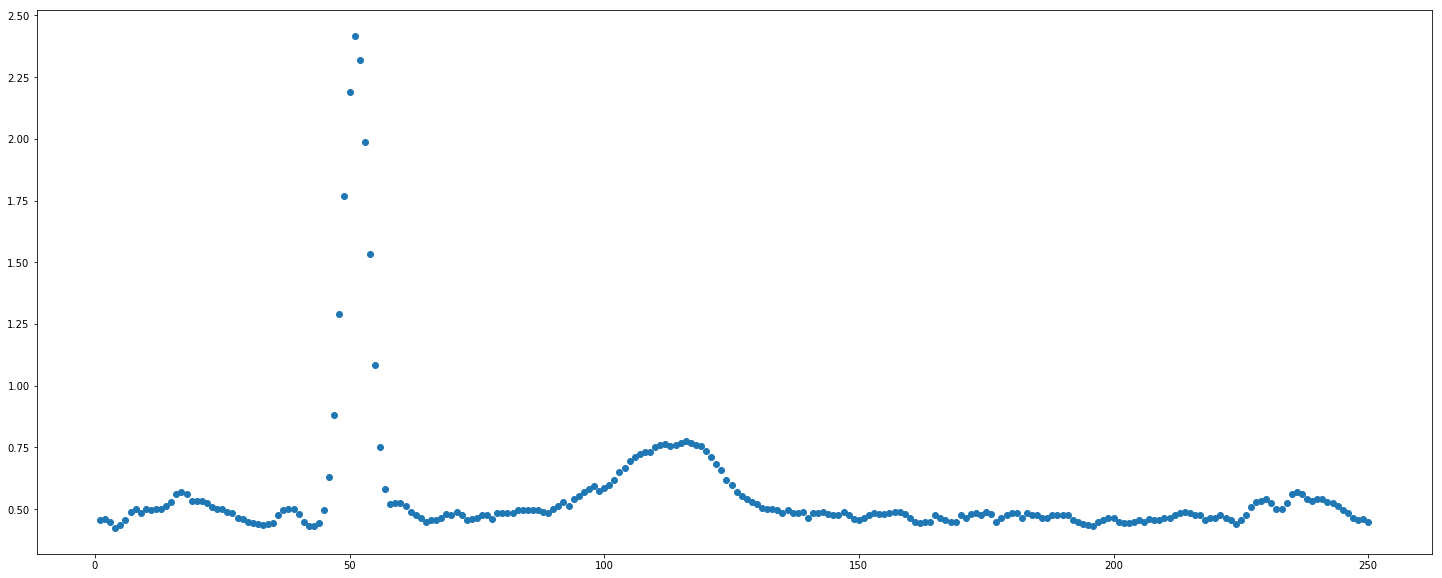

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25,10)

ts=np.array([x+1 for x in range(250)])
plt.scatter(ts,x)
plt.show()

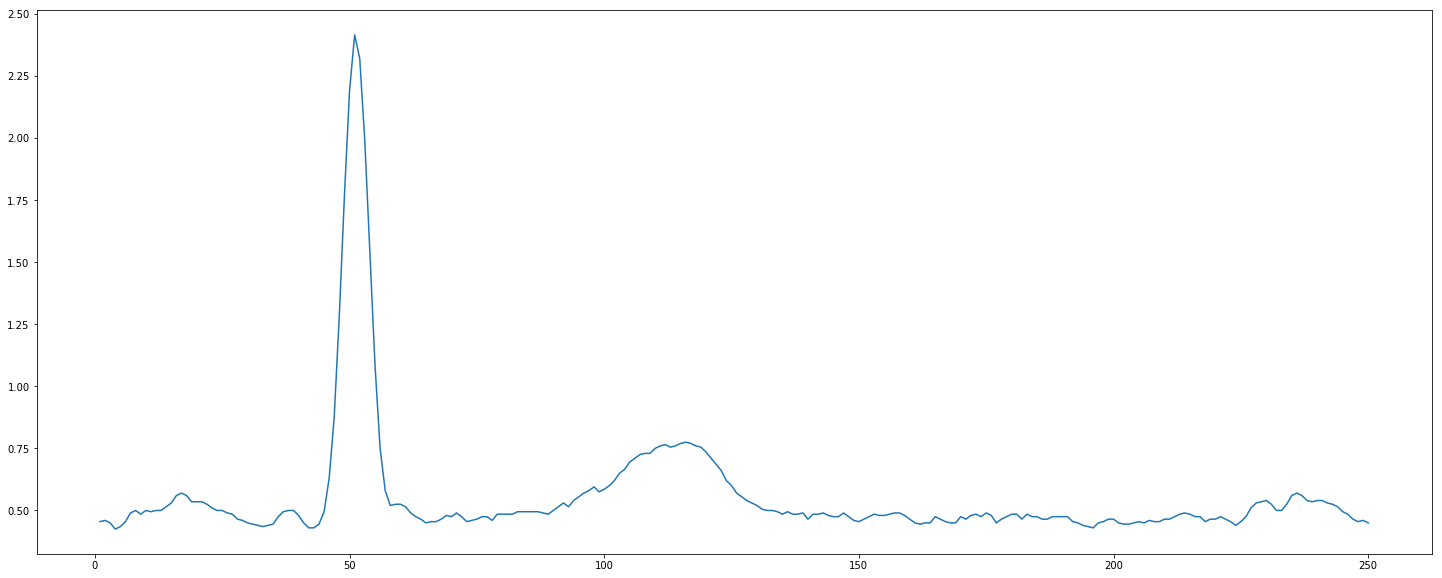

In [9]:
ts=np.array([x+1 for x in range(250)])
plt.plot(ts,x)
plt.show()

[0.455 0.46  0.45  ... 0.485 0.49  0.485]
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


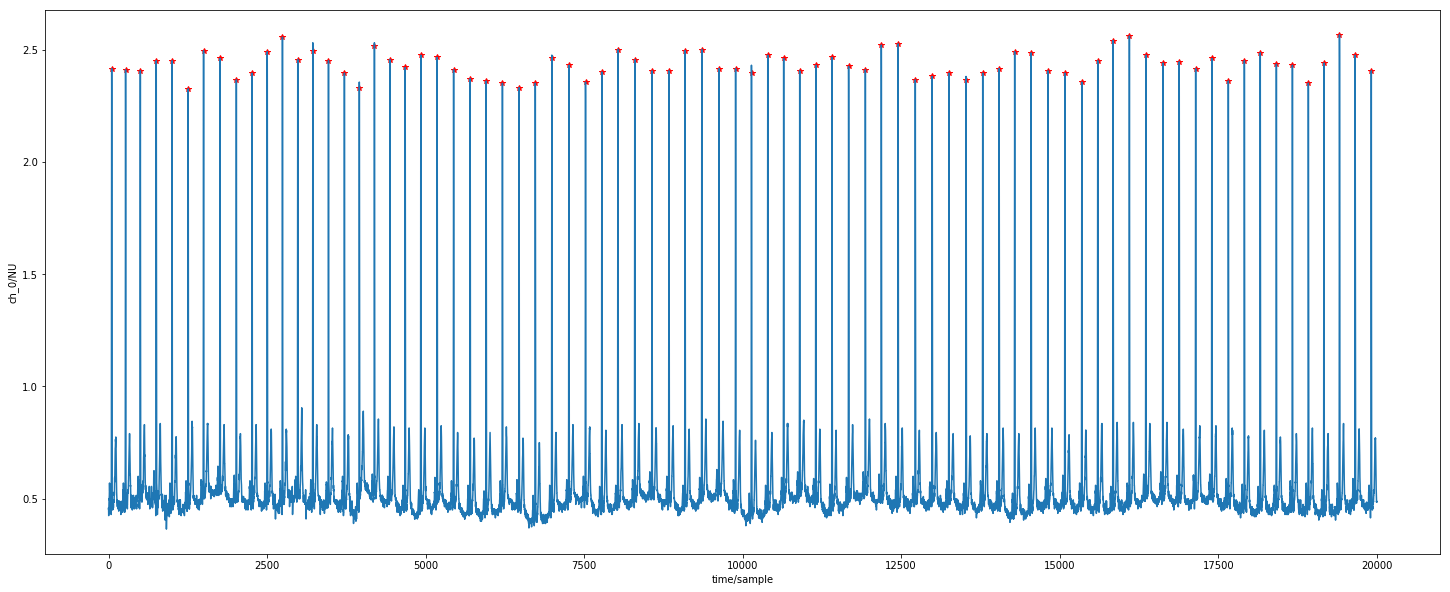

[      nan       nan       nan ... 60.728745 60.728745 60.728745]


In [10]:
x2=x1[:20000]
npar=np.array(x2)
npar=npar.ravel()
print(npar)
xqrs1 = processing.XQRS(sig=npar, fs=fields['fs'])
xqrs1.detect()
wfdb.plot_items(signal=npar, ann_samp=[xqrs1.qrs_inds])
print(processing.hr.compute_hr(len(npar),xqrs1.qrs_inds,fields['fs']))

In [14]:
for ele in processing.hr.compute_hr(len(npar),xqrs1.qrs_inds,fields['fs']):
    print(ele)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
57.91506
5

62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
62.5
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.728745
60.72

58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
58.82353
5

55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
55.14706
5

59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.288536
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.055

55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
55.35055
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251907
57.251

58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534
58.139534


59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.760956
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.05512
59.055

# find the QRS points

In [11]:
import math
r_point_y=max(x)
point=np.where(x == max(x))[0][0]
r_point_x=ts[point]
# next we find the slope made by the line connecting to the s point
for j in range(point,150):
    if x[j]<x[j+1]:
        break
for k in range(point,0,-1):
    if x[k-1]>x[k]:
        break
q_point_y=x[k]
q_point_x=ts[k]
s_point_y=x[j]
s_point_x=ts[j]

# plot the QRS points and mark the area

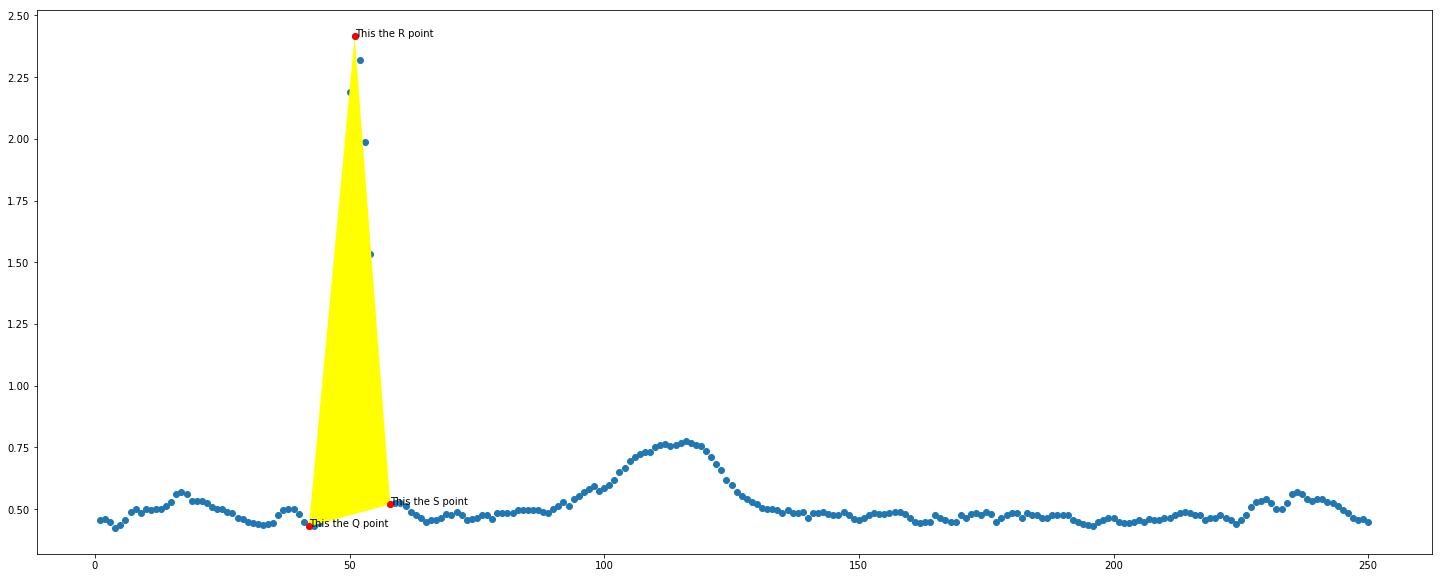

In [12]:
from matplotlib.patches import Polygon
ts=np.array([x+1 for x in range(250)])
plt.scatter(ts,x)

plt.plot(r_point_x,r_point_y, '-o',color="red")
plt.text(r_point_x,r_point_y,'This the R point')
plt.plot(q_point_x,q_point_y, '-o',color="red")
plt.text(q_point_x,q_point_y,'This the Q point')
plt.plot(s_point_x,s_point_y, '-o',color="red")
plt.text(s_point_x,s_point_y,'This the S point')
pts = np.array([[q_point_x,q_point_y], [r_point_x,r_point_y], [s_point_x,s_point_y]])
p = Polygon(pts, closed=False, fill=True, facecolor="yellow")

ax = plt.gca()
ax.add_patch(p)
#ax.set_xlim(1,7)
#ax.set_ylim(1,8)
plt.show()

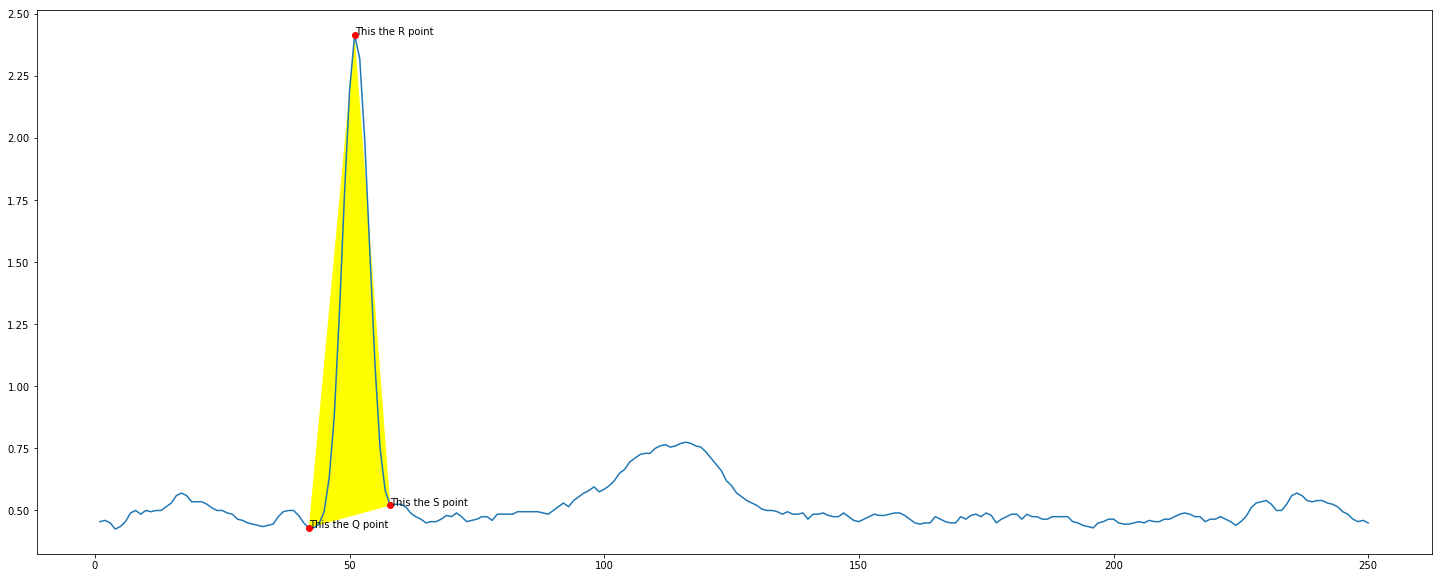

In [13]:
ts=np.array([x+1 for x in range(250)])
plt.plot(ts,x)

plt.plot(r_point_x,r_point_y, '-o',color="red")
plt.text(r_point_x,r_point_y,'This the R point')
plt.plot(q_point_x,q_point_y, '-o',color="red")
plt.text(q_point_x,q_point_y,'This the Q point')
plt.plot(s_point_x,s_point_y, '-o',color="red")
plt.text(s_point_x,s_point_y,'This the S point')
pts = np.array([[q_point_x,q_point_y], [r_point_x,r_point_y], [s_point_x,s_point_y]])
p = Polygon(pts, closed=False, fill=True, facecolor="yellow")

ax = plt.gca()
ax.add_patch(p)
#ax.set_xlim(1,7)
#ax.set_ylim(1,8)
plt.show()